In [17]:
import pandas as pd
import pathlib as path
import matplotlib as plt
import ast


In [2]:
cleaned_movie_data_df = pd.read_csv("Resources/cleaned_movie_data.csv")

cleaned_movie_data_df

,Unnamed: 0,Budget,Genres,ID,IMDB ID,Popularity,Production Country,Revenue,Movie Title,Average Rating,Vote County
0,0,30000000,Animation,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
1,1,30000000,Comedy,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
2,2,30000000,Family,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
3,3,65000000,Adventure,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
4,4,65000000,Fantasy,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
...,...,...,...,...,...,...,...,...,...,...,...
116432,93487,0,Action,67758,tt0303758,0.903007,United States of America,0.0,Betrayal,3.8,6.0
116433,93488,0,Drama,67758,tt0303758,0.903007,United States of America,0.0,Betrayal,3.8,6.0
116434,93489,0,Thriller,67758,tt0303758,0.903007,United States of America,0.0,Betrayal,3.8,6.0
116435,93490,0,NaN,227506,tt0008536,0.003503,Russia,0.0,Satan Triumphant,0.0,0.0


In [3]:
cleaned_movie_data_df = cleaned_movie_data_df[(cleaned_movie_data_df !=0).all(axis=1)]

cleaned_movie_data_df

,Unnamed: 0,Budget,Genres,ID,IMDB ID,Popularity,Production Country,Revenue,Movie Title,Average Rating,Vote County
1,1,30000000,Comedy,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
2,2,30000000,Family,862,tt0114709,21.946943,United States of America,373554033.0,Toy Story,7.7,5415.0
3,3,65000000,Adventure,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
4,4,65000000,Fantasy,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
5,5,65000000,Family,8844,tt0113497,17.015539,United States of America,262797249.0,Jumanji,6.9,2413.0
...,...,...,...,...,...,...,...,...,...,...,...
116311,93383,2000000,Drama,63281,tt1718881,0.121844,Russia,1268793.0,Pro Lyuboff,4.0,3.0
116330,93400,5000000,Action,63898,tt1110037,0.039793,Russia,1413000.0,Antidur,1.0,1.0
116331,93401,5000000,Comedy,63898,tt1110037,0.039793,Russia,1413000.0,Antidur,1.0,1.0
116332,93402,5000000,Crime,63898,tt1110037,0.039793,Russia,1413000.0,Antidur,1.0,1.0


In [4]:
budget_revenue_comp_df = cleaned_movie_data_df.groupby("Genres")[["Budget", "Revenue"]].mean().reset_index()

budget_revenue_comp_df

,Genres,Budget,Revenue
0,Action,5.340187e+07,1.444742e+08
1,Adventure,6.683163e+07,2.024051e+08
2,Animation,5.910320e+07,1.941754e+08
3,Comedy,2.861673e+07,8.133823e+07
4,Crime,2.964347e+07,7.062343e+07
5,Documentary,6.057482e+06,1.911885e+07
6,Drama,2.386656e+07,5.893994e+07
7,Family,5.911703e+07,1.914142e+08
8,Fantasy,6.342396e+07,1.979628e+08
9,Foreign,3.700846e+06,3.433224e+06


In [5]:
# Original Question - What is the distribution of MPAA ratings (e.g., PG, PG-13, R) across different genres?

# Does revenue per genre correlate with profitability by genre?


profitability_by_genre_df = budget_revenue_comp_df["Revenue"] - budget_revenue_comp_df["Budget"]

profitability_by_genre_df

0     9.107237e+07
1     1.355734e+08
2     1.350722e+08
3     5.272149e+07
4     4.097997e+07
5     1.306137e+07
6     3.507338e+07
7     1.322972e+08
8     1.345389e+08
9    -2.676222e+05
10    2.973896e+07
11    3.681409e+07
12    4.269488e+07
13    5.021738e+07
14    4.306671e+07
15    9.461922e+07
16    3.700000e+07
17    5.429917e+07
18    4.391131e+07
19    3.219018e+07
dtype: float64

In [6]:
profitability_by_genre_df = pd.DataFrame(profitability_by_genre_df)


profitability_by_genre_df

,0
0,9.107237e+07
1,1.355734e+08
2,1.350722e+08
3,5.272149e+07
4,4.097997e+07
5,1.306137e+07
6,3.507338e+07
7,1.322972e+08
8,1.345389e+08
9,-2.676222e+05


In [7]:
renamed_profitability_df = profitability_by_genre_df.rename(columns={0: "Profit or Loss"})
renamed_profitability_df.head()

,Profit or Loss
0,9.107237e+07
1,1.355734e+08
2,1.350722e+08
3,5.272149e+07
4,4.097997e+07


In [8]:
renamed_profitability_df["Profit or Loss"] = round(renamed_profitability_df["Profit or Loss"], 1)

renamed_profitability_df

,Profit or Loss
0,91072365.6
1,135573436.5
2,135072215.2
3,52721494.4
4,40979965.5
5,13061365.2
6,35073376.8
7,132297184.3
8,134538866.0
9,-267622.2


In [9]:
final_profitability_by_genre_df = budget_revenue_comp_df.join(renamed_profitability_df, how='inner')

final_profitability_by_genre_df.head()

,Genres,Budget,Revenue,Profit or Loss
0,Action,5.340187e+07,1.444742e+08,91072365.6
1,Adventure,6.683163e+07,2.024051e+08,135573436.5
2,Animation,5.910320e+07,1.941754e+08,135072215.2
3,Comedy,2.861673e+07,8.133823e+07,52721494.4
4,Crime,2.964347e+07,7.062343e+07,40979965.5


In [10]:
final_profitability_by_genre_df["Revenue"] = round(final_profitability_by_genre_df["Revenue"], 1)

final_profitability_by_genre_df

,Genres,Budget,Revenue,Profit or Loss
0,Action,5.340187e+07,144474234.8,91072365.6
1,Adventure,6.683163e+07,202405064.7,135573436.5
2,Animation,5.910320e+07,194175414.1,135072215.2
3,Comedy,2.861673e+07,81338226.9,52721494.4
4,Crime,2.964347e+07,70623434.4,40979965.5
5,Documentary,6.057482e+06,19118847.5,13061365.2
6,Drama,2.386656e+07,58939935.9,35073376.8
7,Family,5.911703e+07,191414211.8,132297184.3
8,Fantasy,6.342396e+07,197962826.4,134538866.0
9,Foreign,3.700846e+06,3433223.9,-267622.2


In [11]:
final_profitability_by_genre_df["Budget"] = round(final_profitability_by_genre_df["Budget"], 1)

final_profitability_by_genre_df

,Genres,Budget,Revenue,Profit or Loss
0,Action,53401869.2,144474234.8,91072365.6
1,Adventure,66831628.2,202405064.7,135573436.5
2,Animation,59103198.8,194175414.1,135072215.2
3,Comedy,28616732.5,81338226.9,52721494.4
4,Crime,29643469.0,70623434.4,40979965.5
5,Documentary,6057482.2,19118847.5,13061365.2
6,Drama,23866559.1,58939935.9,35073376.8
7,Family,59117027.5,191414211.8,132297184.3
8,Fantasy,63423960.4,197962826.4,134538866.0
9,Foreign,3700846.0,3433223.9,-267622.2


In [12]:
profit_percentage_df = final_profitability_by_genre_df["Profit or Loss"] / final_profitability_by_genre_df["Budget"] * 100

profit_percentage_df

0     170.541532
1     202.858198
2     228.536218
3     184.233103
4     138.242813
5     215.623666
6     146.956152
7     223.788627
8     212.126246
9      -7.231379
10     90.247065
11    187.139598
12    207.930915
13    155.199162
14    195.226057
15    174.452936
16    740.000000
17    152.445202
18    119.588767
19    108.122823
dtype: float64

In [13]:
profit_percentage_df = pd.DataFrame(profit_percentage_df)

profit_percentage_df

,0
0,170.541532
1,202.858198
2,228.536218
3,184.233103
4,138.242813
5,215.623666
6,146.956152
7,223.788627
8,212.126246
9,-7.231379


In [14]:
profit_percentage_df = profit_percentage_df.rename(columns={0: "Profit / Loss %"})

profit_percentage_df


,Profit / Loss %
0,170.541532
1,202.858198
2,228.536218
3,184.233103
4,138.242813
5,215.623666
6,146.956152
7,223.788627
8,212.126246
9,-7.231379


In [16]:
# Create a bar chart to visualize the 

final_profitability_by_genre_df = final_profitability_by_genre_df.join(profit_percentage_df, how="inner")

final_profitability_by_genre_df

,Genres,Budget,Revenue,Profit or Loss,Profit / Loss %
0,Action,53401869.2,144474234.8,91072365.6,170.541532
1,Adventure,66831628.2,202405064.7,135573436.5,202.858198
2,Animation,59103198.8,194175414.1,135072215.2,228.536218
3,Comedy,28616732.5,81338226.9,52721494.4,184.233103
4,Crime,29643469.0,70623434.4,40979965.5,138.242813
5,Documentary,6057482.2,19118847.5,13061365.2,215.623666
6,Drama,23866559.1,58939935.9,35073376.8,146.956152
7,Family,59117027.5,191414211.8,132297184.3,223.788627
8,Fantasy,63423960.4,197962826.4,134538866.0,212.126246
9,Foreign,3700846.0,3433223.9,-267622.2,-7.231379


In [20]:
import matplotlib.pyplot as plt

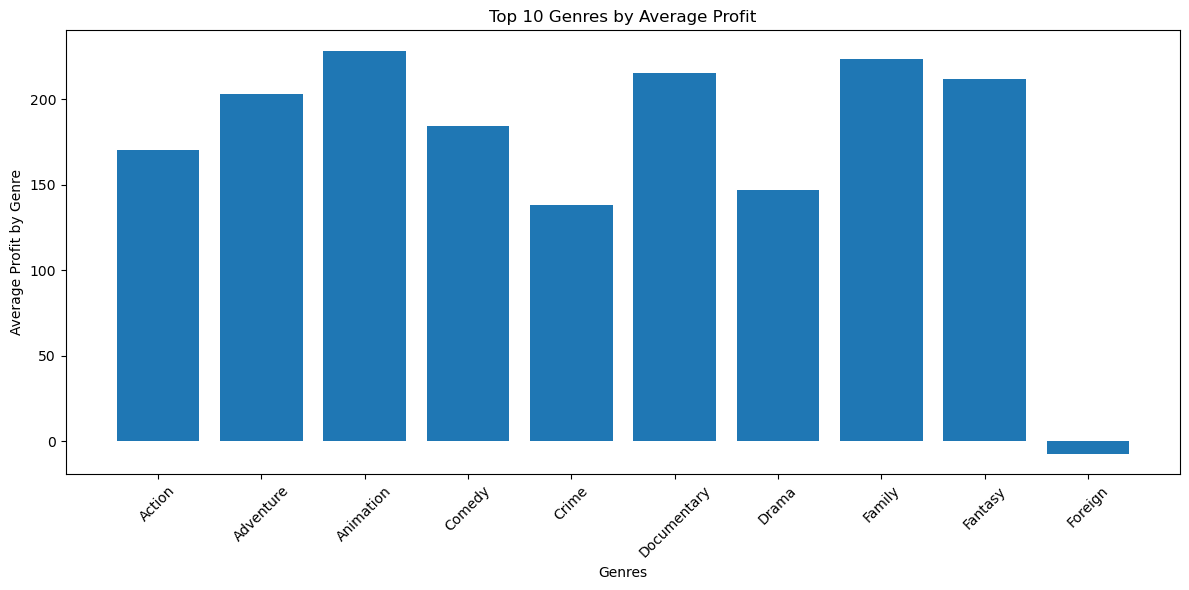

In [21]:
avg_profit_by_genre_df = final_profitability_by_genre_df.head(10)

plt.figure(figsize = (12,6))
plt.bar(avg_profit_by_genre_df["Genres"], (avg_profit_by_genre_df["Profit / Loss %"]))
plt.xlabel("Genres")
plt.ylabel("Average Profit by Genre")
plt.title("Top 10 Genres by Average Profit")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()